### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
from sklearn.model_selection import RandomizedSearchCV

In [6]:
from sklearn.metrics import mean_absolute_error

### Data Understanding

Muat dataset

In [7]:
df = pd.read_csv('dataset/train.csv')

Menampilkan 5 baris pertama data

In [8]:
print("Lima baris pertama dataset:")
print(df.head())

Lima baris pertama dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SaleP

Menampilkan informasi umum dataset (jumlah baris, kolom, tipe data, non-null values)

In [9]:
print("\nInformasi umum dataset:")
df.info()


Informasi umum dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nul

Menampilkan jumlah baris dan kolom

In [10]:
print(f"\nJumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")


Jumlah baris: 1460
Jumlah kolom: 81


Mengecek missing values

In [11]:
print("\nJumlah missing values per kolom:")
print(df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False))


Jumlah missing values per kolom:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


Menampilkan statistik deskriptif untuk kolom numerik

In [12]:
print("\nStatistik deskriptif untuk kolom numerik:")
print(df.describe())


Statistik deskriptif untuk kolom numerik:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904 

### EDA dan Visualisasi Data

Distribusi SalePrice

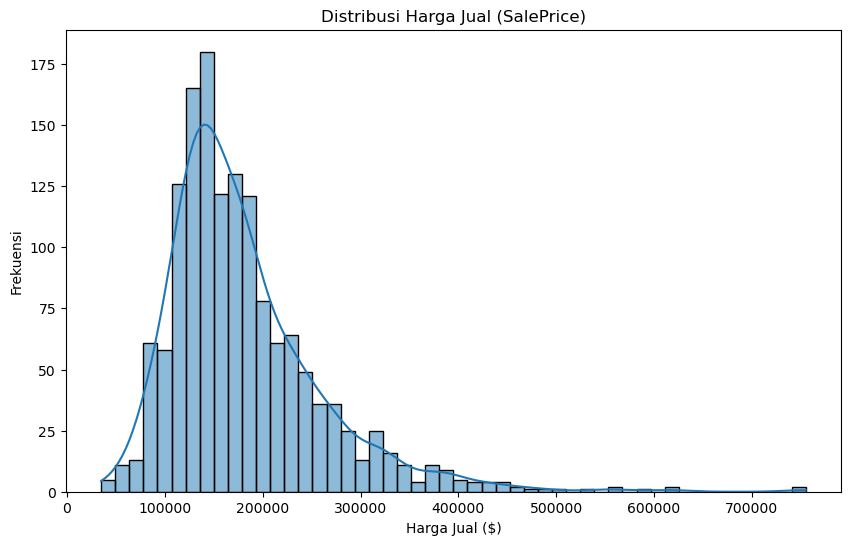

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=50)
plt.title('Distribusi Harga Jual (SalePrice)')
plt.xlabel('Harga Jual ($)')
plt.ylabel('Frekuensi')
plt.show()

Transformasi log SalePrice untuk melihat distribusi yang lebih normal

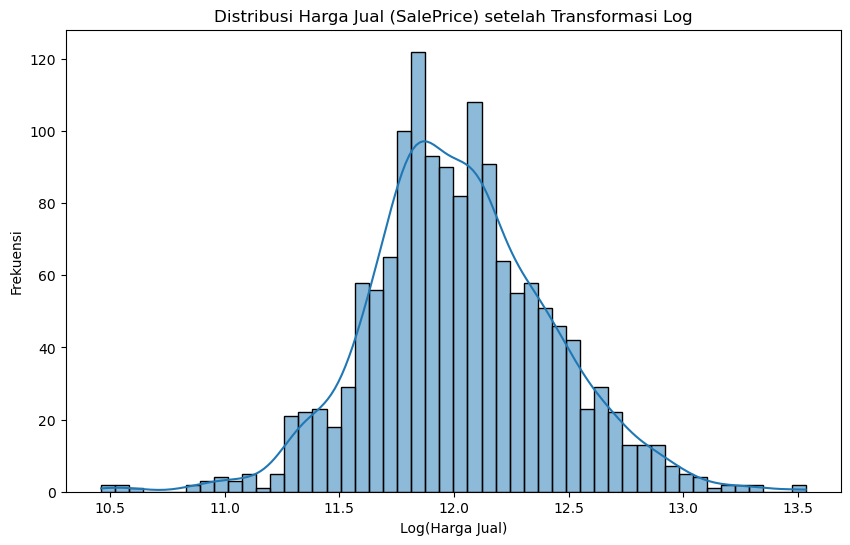

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['SalePrice']), kde=True, bins=50)
plt.title('Distribusi Harga Jual (SalePrice) setelah Transformasi Log')
plt.xlabel('Log(Harga Jual)')
plt.ylabel('Frekuensi')
plt.show()

Korelasi antara fitur numerik dengan SalePrice

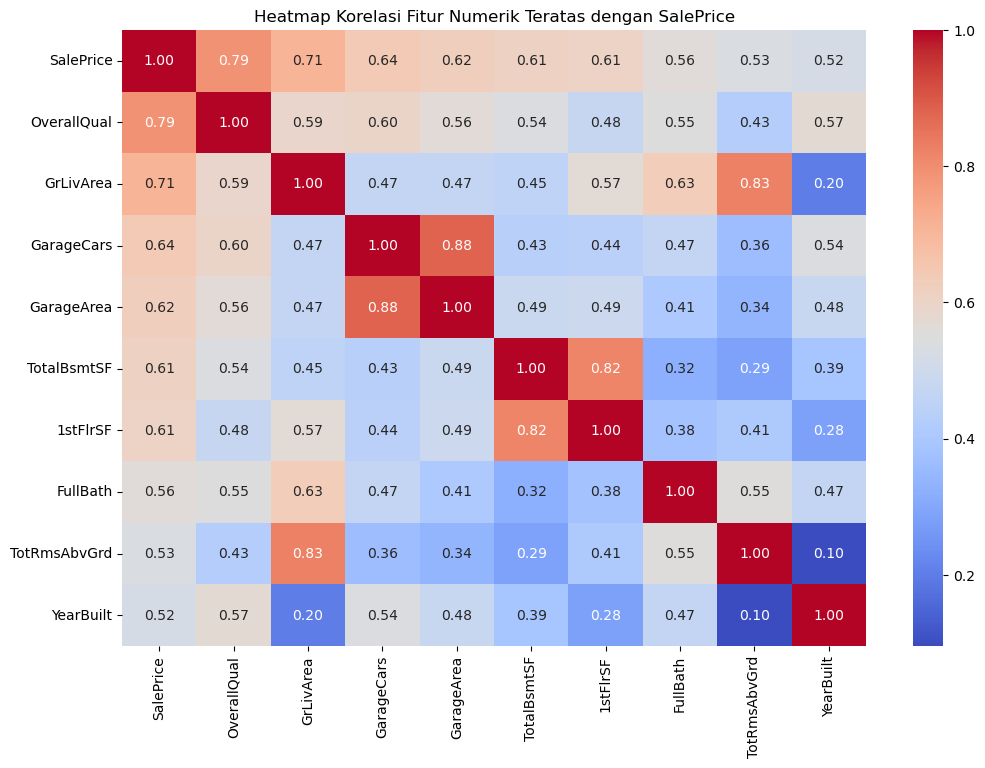

In [15]:
numeric_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_cols].corr()
top_correlated_features = correlation_matrix.nlargest(10, 'SalePrice')['SalePrice'].index

plt.figure(figsize=(12, 8))
sns.heatmap(df[top_correlated_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik Teratas dengan SalePrice')
plt.show()

Scatter plot beberapa fitur dengan SalePrice

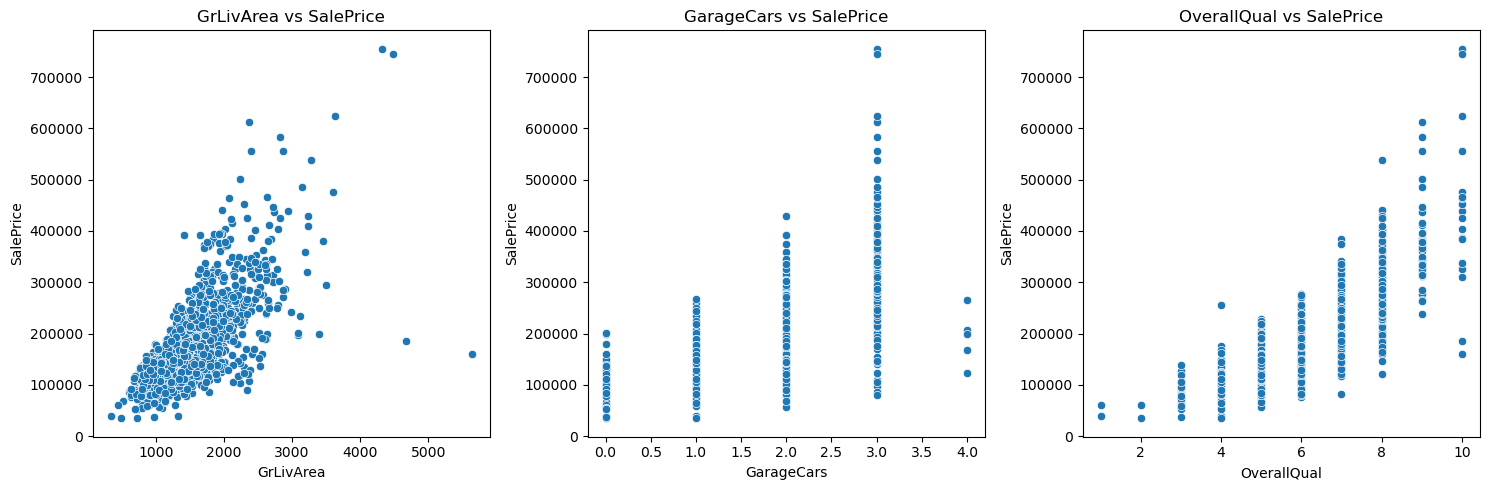

In [16]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('GrLivArea vs SalePrice')

plt.subplot(1, 3, 2)
sns.scatterplot(x='GarageCars', y='SalePrice', data=df)
plt.title('GarageCars vs SalePrice')

plt.subplot(1, 3, 3)
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)
plt.title('OverallQual vs SalePrice')

plt.tight_layout()
plt.show()

Analisis fitur kategorikal (contoh: Neighborhood vs SalePrice)

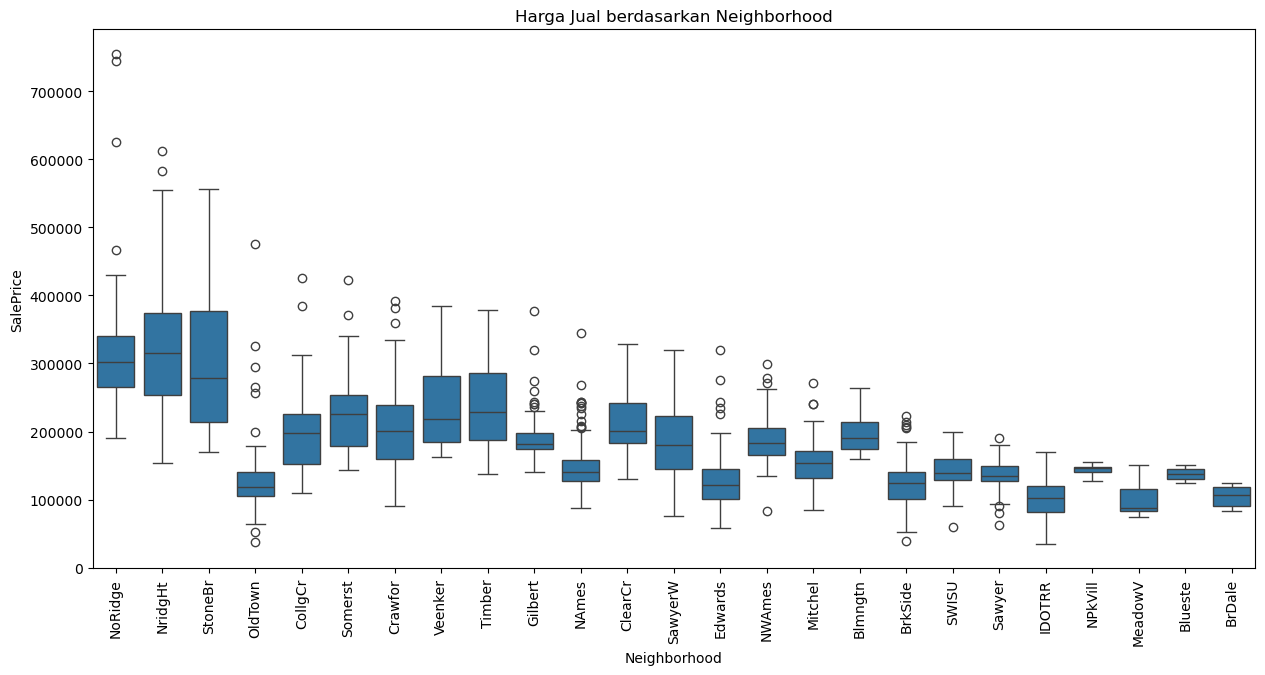

In [17]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))
plt.title('Harga Jual berdasarkan Neighborhood')
plt.xticks(rotation=90)
plt.show()

### Data Preparation

# Menangani Missing Values

Seperti yang terlihat di tahap Data Understanding, beberapa kolom memiliki missing values yang tinggi. Kita akan menentukan strategi imputasi atau penghapusan berdasarkan persentase missing values dan karakteristik fitur.

Menghitung persentase missing values

In [18]:
missing_percentages = df.isnull().sum() / len(df) * 100
print("Persentase Missing Values per Kolom (lebih dari 0%):")
print(missing_percentages[missing_percentages > 0].sort_values(ascending=False))

Persentase Missing Values per Kolom (lebih dari 0%):
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


Kolom dengan missing values yang sangat tinggi (>50%) mungkin lebih baik dihapus
Kolom: PoolQC, MiscFeature, Alley, Fence memiliki lebih dari 80% missing values
GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond memiliki sekitar 5% missing values
Bsmt* features (BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2) juga memiliki missing values.

Menentukan kolom numerik dan kategorikal

In [19]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

Karena 'Id' bukan fitur prediktif, kita akan menghapusnya dan 'SalePrice' adalah target, jadi kita pisahkan

In [20]:
numerical_cols.remove('Id')
numerical_cols.remove('SalePrice')

Menentukan fitur-fitur yang akan di-drop karena terlalu banyak missing values

In [21]:
features_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence'] 
df_cleaned = df.drop(columns=features_to_drop)

Perbarui daftar kolom numerik dan kategorikal setelah dropping

In [22]:
numerical_cols_cleaned = df_cleaned.select_dtypes(include=np.number).columns.tolist()
categorical_cols_cleaned = df_cleaned.select_dtypes(include='object').columns.tolist()

Hapus 'SalePrice' dari numerical_cols_cleaned karena itu target

In [23]:
numerical_cols_cleaned.remove('SalePrice')

# Strategi Imputasi Missing Values

Untuk kolom numerik, kita bisa menggunakan imputasi median atau mean. Untuk kolom kategorikal, kita bisa menggunakan imputasi mode atau menandai 'None' jika missing value memang berarti tidak ada fitur tersebut (misalnya, tidak ada basement, tidak ada garasi).


Mari kita cek ulang missing values setelah drop beberapa kolom

In [24]:
print("\nMissing values setelah drop kolom:")
print(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0].sort_values(ascending=False))


Missing values setelah drop kolom:
MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
Electrical        1
dtype: int64


Kolom kategorikal yang missing values-nya berarti 'None' (tidak ada):

In [25]:
cat_none_cols = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu']
for col in cat_none_cols:
    if col in df_cleaned.columns: 
        df_cleaned[col] = df_cleaned[col].fillna('None')

Kolom numerik yang missing, isi dengan median

In [26]:
numerical_cols_for_imputation = ['LotFrontage']
for col in numerical_cols_for_imputation:
    if col in df_cleaned.columns and df_cleaned[col].isnull().any():
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

Untuk MasVnrArea dan GarageYrBlt, kita isi 0 karena sesuai dengan 'None' pada fitur kategorinya

In [27]:
if 'MasVnrArea' in df_cleaned.columns:
    df_cleaned['MasVnrArea'] = df_cleaned['MasVnrArea'].fillna(0)
if 'GarageYrBlt' in df_cleaned.columns:
    df_cleaned['GarageYrBlt'] = df_cleaned['GarageYrBlt'].fillna(0)

print("\nMissing values setelah imputasi:")
print(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0].sort_values(ascending=False))


Missing values setelah imputasi:
Electrical    1
dtype: int64


# 3. Feature Engineering (Sederhana)
Membuat beberapa fitur baru yang mungkin relevan

In [28]:
df_cleaned['TotalSF'] = df_cleaned['1stFlrSF'] + df_cleaned['2ndFlrSF'] + df_cleaned['TotalBsmtSF']
df_cleaned['Age'] = df_cleaned['YrSold'] - df_cleaned['YearBuilt']
df_cleaned['RemodAge'] = df_cleaned['YrSold'] - df_cleaned['YearRemodAdd']
df_cleaned.loc[df_cleaned['Age'] < 0, 'Age'] = 0
df_cleaned.loc[df_cleaned['RemodAge'] < 0, 'RemodAge'] = 0

Fitur yang bisa di-drop setelah feature engineering atau karena redundansi

In [29]:
features_to_drop_after_fe = ['YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF']
df_cleaned = df_cleaned.drop(columns=features_to_drop_after_fe, errors='ignore')

Log Transform pada SalePrice (Target Variable)

In [30]:
df_cleaned['SalePrice_Log'] = np.log1p(df_cleaned['SalePrice'])

# 4. Encoding Fitur Kategorikal

Kita akan menggunakan One-Hot Encoding untuk fitur kategorikal. Ini mengubah kolom kategorikal menjadi representasi numerik biner.

Perbarui daftar kolom kategorikal setelah feature engineering dan dropping

In [31]:
categorical_cols_final = df_cleaned.select_dtypes(include='object').columns.tolist()

Pisahkan fitur dan target

In [32]:
X = df_cleaned.drop(columns=['SalePrice', 'SalePrice_Log']) # Drop SalePrice original dan Log target untuk fitur
y = df_cleaned['SalePrice_Log']

Pisahkan kolom numerik dan kategorikal dari X

In [33]:
numerical_features_final = X.select_dtypes(include=np.number).columns.tolist()
categorical_features_final = X.select_dtypes(include='object').columns.tolist()

Pipeline untuk fitur numerik

In [34]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

Pipeline untuk fitur kategorikal

In [35]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Untuk jaga-jaga kalau ada lagi
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # handle_unknown='ignore' untuk kolom baru di test set
])

Gabungkan pipeline menggunakan ColumnTransformer

In [36]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features_final),
        ('cat', categorical_transformer, categorical_features_final)
    ])

Terapkan preprocessing ke data (ini hanya untuk melihat bentuk akhir, akan diterapkan di pipeline modeling)

In [37]:
X_preprocessed = preprocessor.fit_transform(X)

print("\nBentuk X setelah preprocessing:", X_preprocessed.shape)
print("Jumlah fitur numerik akhir:", len(numerical_features_final))
print("Jumlah fitur kategorikal setelah One-Hot Encoding:", X_preprocessed.shape[1] - len(numerical_features_final))


Bentuk X setelah preprocessing: (1460, 284)
Jumlah fitur numerik akhir: 35
Jumlah fitur kategorikal setelah One-Hot Encoding: 249


### Modelling

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Bentuk X_train: {X_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")
print(f"Bentuk y_train: {y_train.shape}")
print(f"Bentuk y_test: {y_test.shape}")

Bentuk X_train: (1168, 74)
Bentuk X_test: (292, 74)
Bentuk y_train: (1168,)
Bentuk y_test: (292,)


Inisialisasi Model

In [39]:
models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', LinearRegression())]),
    'Random Forest Regressor': Pipeline(steps=[('preprocessor', preprocessor),
                                                ('regressor', RandomForestRegressor(random_state=42))]),
    'XGBoost Regressor': Pipeline(steps=[('preprocessor', preprocessor),
                                          ('regressor', XGBRegressor(random_state=42, n_jobs=-1))])
}

Melatih dan Mengevaluasi Model Dasar (Baseline Models)


--- Melatih dan Mengevaluasi Model Dasar ---

Melatih Linear Regression...
Linear Regression - RMSE: 0.1294
Linear Regression - R2 Score: 0.9103

Melatih Random Forest Regressor...
Random Forest Regressor - RMSE: 0.1468
Random Forest Regressor - R2 Score: 0.8845

Melatih XGBoost Regressor...
XGBoost Regressor - RMSE: 0.1505
XGBoost Regressor - R2 Score: 0.8786


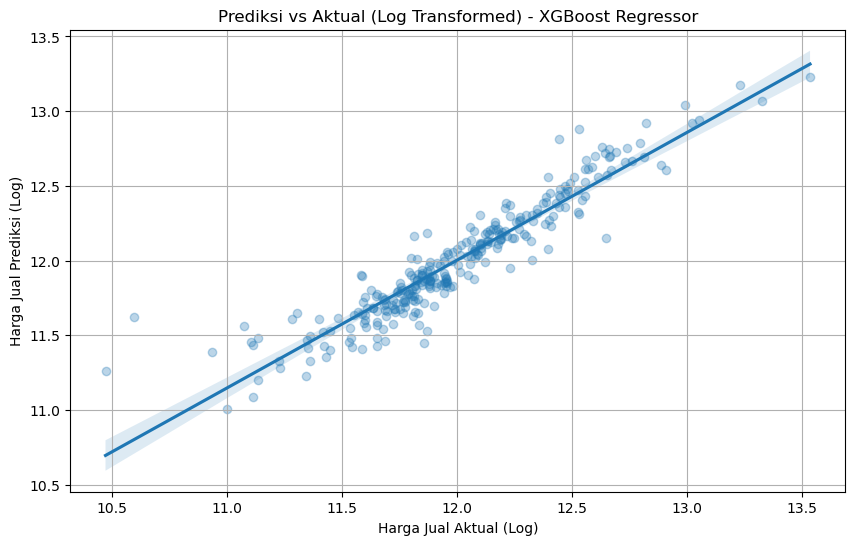

In [40]:
print("\n--- Melatih dan Mengevaluasi Model Dasar ---")
results = {}
for name, model in models.items():
    print(f"\nMelatih {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluasi menggunakan MSE dan R2 Score pada data yang sudah di-log
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # RMSE lebih mudah diinterpretasi karena skalanya sama dengan target
    r2 = r2_score(y_test, y_pred)

    results[name] = {'RMSE': rmse, 'R2_Score': r2}

    print(f"{name} - RMSE: {rmse:.4f}")
    print(f"{name} - R2 Score: {r2:.4f}")

    # Visualisasi Prediksi vs Aktual (untuk salah satu model, misal XGBoost)
    if name == 'XGBoost Regressor':
        plt.figure(figsize=(10, 6))
        sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3})
        plt.title(f'Prediksi vs Aktual (Log Transformed) - {name}')
        plt.xlabel('Harga Jual Aktual (Log)')
        plt.ylabel('Harga Jual Prediksi (Log)')
        plt.grid(True)
        plt.show()

Menampilkan hasil perbandingan model dasar

In [41]:
print("\n--- Hasil Perbandingan Model Dasar ---")
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by='RMSE'))


--- Hasil Perbandingan Model Dasar ---
                             RMSE  R2_Score
Linear Regression        0.129410  0.910258
Random Forest Regressor  0.146811  0.884500
XGBoost Regressor        0.150545  0.878551


Hyperparameter Tuning untuk Model Terbaik (XGBoost)

In [42]:
print("\n--- Hyperparameter Tuning (XGBoost Regressor) dengan RandomizedSearchCV ---")

# Parameter distribution yang lebih luas karena RandomizedSearchCV akan mengambil sampel secara acak
param_dist_xgb = {
    'regressor__n_estimators': [100, 200, 300, 400, 500, 600],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'regressor__max_depth': [3, 4, 5, 6, 7, 8],
    'regressor__subsample': [0.7, 0.8, 0.9, 1.0], # Tambahan parameter untuk eksplorasi
    'regressor__colsample_bytree': [0.7, 0.8, 0.9, 1.0] # Tambahan parameter
}

# Buat model XGBoost dalam pipeline
xgb_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', XGBRegressor(random_state=42, n_jobs=-1, tree_method='hist')) # Tambahkan tree_method='hist'
                                    ])

# Inisialisasi RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb_model_pipeline,
                                       param_distributions=param_dist_xgb,
                                       n_iter=20, # Jumlah kombinasi parameter yang akan dicoba (sesuaikan ini)
                                       cv=5, # 5-fold cross-validation
                                       scoring='neg_root_mean_squared_error', # Skoring untuk RMSE
                                       n_jobs=-1, # Gunakan semua core CPU
                                       random_state=42, # Penting untuk reproduktifitas
                                       verbose=1)

print(f"Memulai RandomizedSearchCV untuk XGBoost Regressor (mencoba {random_search_xgb.n_iter} kombinasi)...")
random_search_xgb.fit(X_train, y_train)

print(f"\nParameter terbaik untuk XGBoost: {random_search_xgb.best_params_}")
print(f"RMSE terbaik dari Cross-Validation: {-random_search_xgb.best_score_:.4f}")


--- Hyperparameter Tuning (XGBoost Regressor) dengan RandomizedSearchCV ---
Memulai RandomizedSearchCV untuk XGBoost Regressor (mencoba 20 kombinasi)...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Parameter terbaik untuk XGBoost: {'regressor__subsample': 0.9, 'regressor__n_estimators': 500, 'regressor__max_depth': 4, 'regressor__learning_rate': 0.1, 'regressor__colsample_bytree': 0.7}
RMSE terbaik dari Cross-Validation: 0.1263


Evaluasi model XGBoost terbaik pada test set

In [43]:
best_xgb_model = random_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mse_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f"\n--- Evaluasi XGBoost Terbaik (setelah tuning) ---")
print(f"RMSE (Test Set): {rmse_best_xgb:.4f}")
print(f"R2 Score (Test Set): {r2_best_xgb:.4f}")


--- Evaluasi XGBoost Terbaik (setelah tuning) ---
RMSE (Test Set): 0.1337
R2 Score (Test Set): 0.9042


Visualisasi Prediksi vs Aktual untuk model terbaik setelah tuning

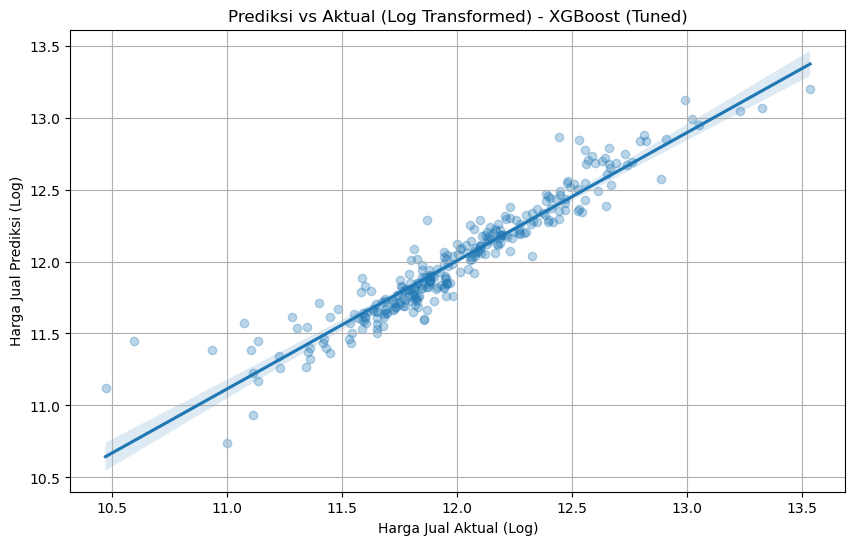

In [44]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_best_xgb, scatter_kws={'alpha':0.3})
plt.title(f'Prediksi vs Aktual (Log Transformed) - XGBoost (Tuned)')
plt.xlabel('Harga Jual Aktual (Log)')
plt.ylabel('Harga Jual Prediksi (Log)')
plt.grid(True)
plt.show()

### Evaluation

Menghitung Metrik Evaluasi pada Skala Log (sesuai target model)

In [45]:
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
mae_log = mean_absolute_error(y_test, y_pred_best_xgb)
r2_log = r2_score(y_test, y_pred_best_xgb)

print("--- Metrik Evaluasi Model Terbaik (pada skala Log) ---")
print(f"RMSE (Log Scale): {rmse_log:.4f}")
print(f"MAE (Log Scale): {mae_log:.4f}")
print(f"R2 Score (Log Scale): {r2_log:.4f}")

--- Metrik Evaluasi Model Terbaik (pada skala Log) ---
RMSE (Log Scale): 0.1337
MAE (Log Scale): 0.0883
R2 Score (Log Scale): 0.9042


Mengubah Prediksi Kembali ke Skala Asli untuk Interpretasi yang Lebih Baik

In [46]:
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_best_xgb)

Menghitung Metrik Evaluasi pada Skala Asli

In [47]:
rmse_original = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae_original = mean_absolute_error(y_test_original, y_pred_original)
r2_original = r2_score(y_test_original, y_pred_original)

print("\n--- Metrik Evaluasi Model Terbaik (pada skala Harga Asli) ---")
print(f"RMSE (Original Scale): ${rmse_original:,.2f}")
print(f"MAE (Original Scale): ${mae_original:,.2f}")
print(f"R2 Score (Original Scale): {r2_original:.4f}")


--- Metrik Evaluasi Model Terbaik (pada skala Harga Asli) ---
RMSE (Original Scale): $27,101.01
MAE (Original Scale): $15,785.65
R2 Score (Original Scale): 0.9042


Visualisasi Hasil Prediksi vs Aktual pada Skala Asli

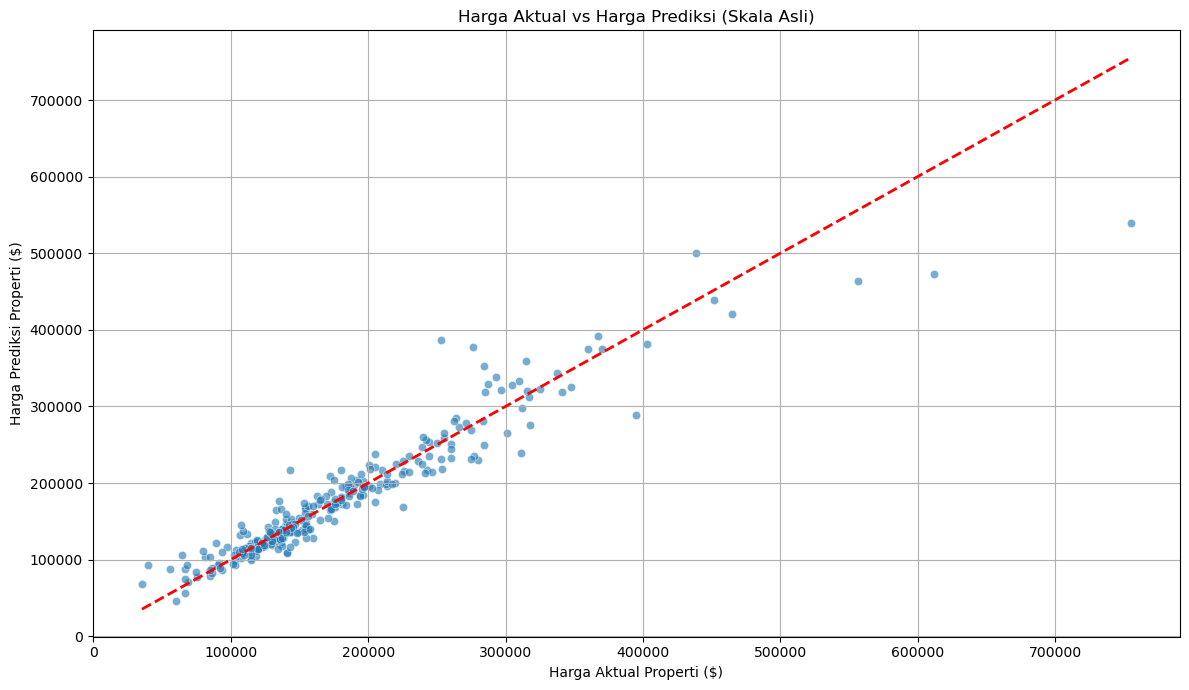

In [48]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=y_test_original, y=y_pred_original, alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.title('Harga Aktual vs Harga Prediksi (Skala Asli)')
plt.xlabel('Harga Aktual Properti ($)')
plt.ylabel('Harga Prediksi Properti ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

Residual Plot

Melihat distribusi error (residual = aktual - prediksi)

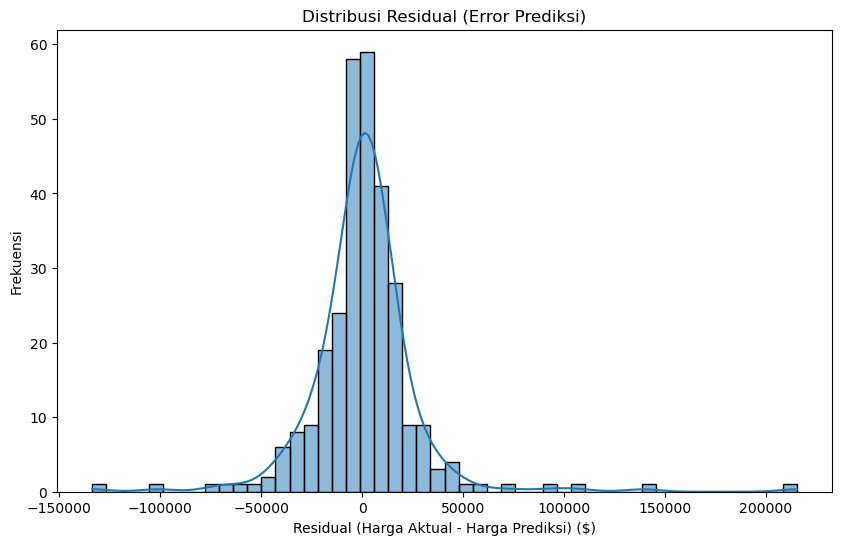

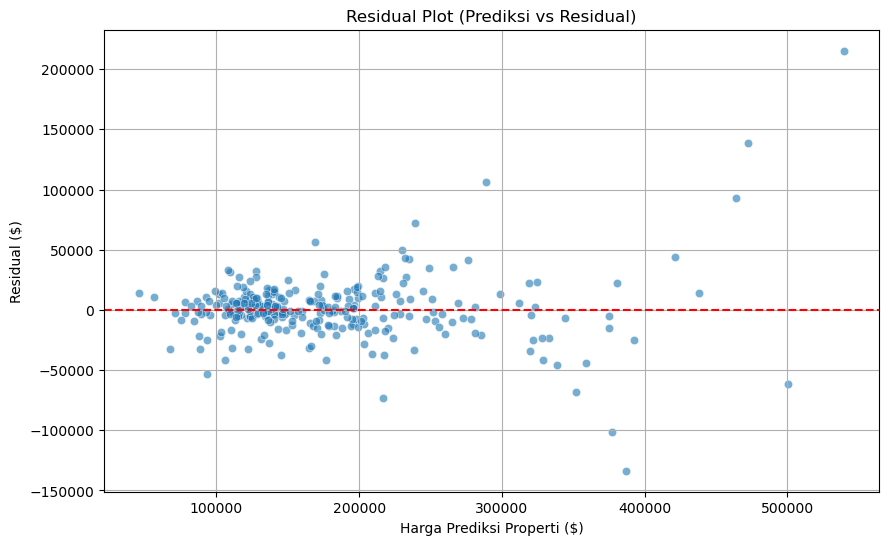

In [49]:
residuals = y_test_original - y_pred_original
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.title('Distribusi Residual (Error Prediksi)')
plt.xlabel('Residual (Harga Aktual - Harga Prediksi) ($)')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_original, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Prediksi vs Residual)')
plt.xlabel('Harga Prediksi Properti ($)')
plt.ylabel('Residual ($)')
plt.grid(True)
plt.show()